# Notebook for GEX data quality check

- Last updated: 11/1/2023
- Author: Yang-Joon Kim
- Goal: We want to assess the data quality of GEX compared to Zebrahub (which we think our sequencing depth was really good).





In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
# import GEX datasets from sc-multiome datasets 
GEX1 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/filtered_feature_bc_matrix.h5") # 15somites_rep1
GEX2 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119/outs/filtered_feature_bc_matrix.h5") # 15somites_rep2
GEX3 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR124/outs/filtered_feature_bc_matrix.h5") # 30somites
GEX4 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR125/outs/filtered_feature_bc_matrix.h5") # 20somites

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
RNA1 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR46/filtered_feature_bc_matrix.h5") # 30 somites
RNA2 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR43/filtered_feature_bc_matrix.h5") # 30 somites
RNA3 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR40/filtered_feature_bc_matrix.h5") # 15 somites     

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
sc.pp.calculate_qc_metrics(GEX1, inplace=True)
sc.pp.calculate_qc_metrics(GEX2, inplace=True)
sc.pp.calculate_qc_metrics(GEX3, inplace=True)
sc.pp.calculate_qc_metrics(GEX4, inplace=True)
sc.pp.calculate_qc_metrics(RNA1, inplace=True)
sc.pp.calculate_qc_metrics(RNA2, inplace=True)
sc.pp.calculate_qc_metrics(RNA3, inplace=True)

Text(0, 0.5, 'number of genes/cell')

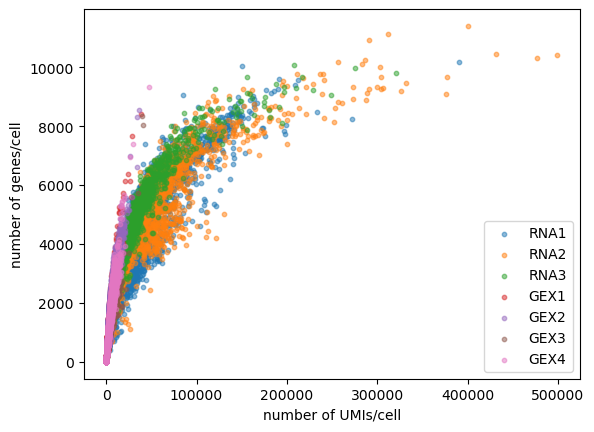

In [54]:
# scatter plot of number of UMIs/cell vs genes/cell at single-cell level (N datasets)

alpha_val = 0.5
size_spot = 10

plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)

plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)



plt.legend(["RNA1","RNA2","RNA3","GEX1","GEX2","GEX3","GEX4"])

plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

Text(0, 0.5, 'number of genes/cell')

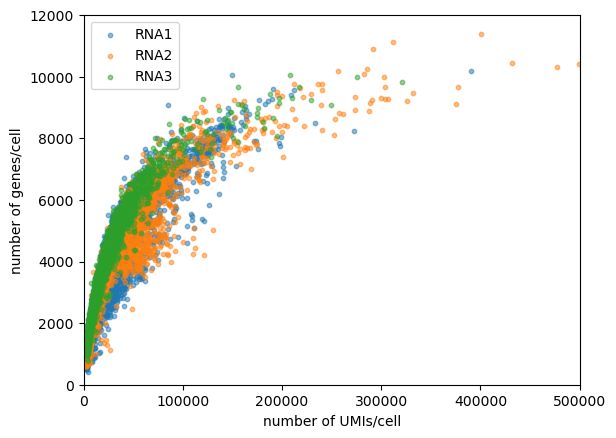

In [55]:
alpha_val = 0.5
size_spot = 10

plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.xlim([0, 500000])
plt.ylim([0,12000])
plt.legend(["RNA1","RNA2","RNA3"])
plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

Text(0, 0.5, 'number of genes/cell')

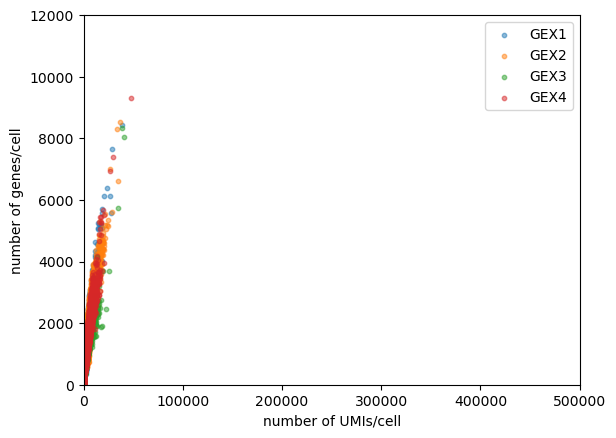

In [56]:
alpha_val = 0.5
size_spot = 10

plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)

plt.xlim([0, 500000])
plt.ylim([0,12000])
plt.legend(["GEX1","GEX2","GEX3","GEX4"])
plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

In [ ]:
plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=0.5)

plt.legend(["GEX1","GEX2","GEX3","GEX4",
            "RNA1","RNA2","RNA3"])

plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

In [12]:
np.median(GEX1.obs.total_counts)
np.median(GEX1.obs.n_genes_by_counts)

959.0

In [24]:
median_UMIs_cell

[2024.0, 3966.0, 2255.5, 2867.0, 8184.0, 3590.0, 5358.0]

In [25]:
median_genes_cell

[959.0, 1644.0, 849.0, 1126.0, 2053.0, 1161.0, 1718.0]

In [27]:
median_UMIs_cell

[2483.8826, 4672.005, 2873.3274, 3265.9392, 13005.609, 13928.306, 9464.16]

In [28]:
median_genes_cell

[1062.0500346500346,
 1738.152437679241,
 944.3947070798462,
 1206.540252827678,
 2344.7421612165253,
 2035.0845360824742,
 2138.9623098667385]

In [31]:
import scipy.stats

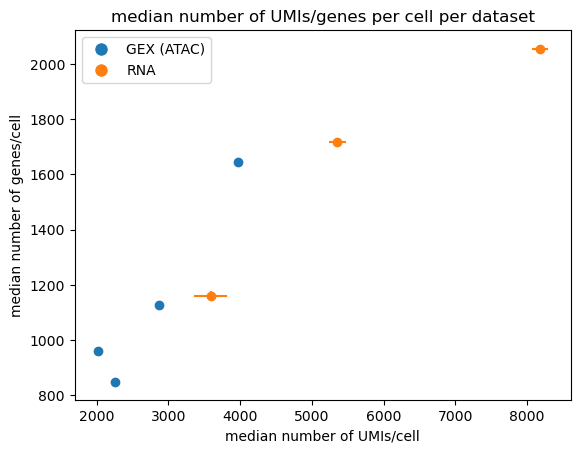

In [63]:
adata_list = [GEX1,GEX2,GEX3,GEX4,RNA1,RNA2,RNA3]
types = ['GEX', 'GEX', 'GEX', 'GEX', 'RNA', 'RNA', 'RNA']

# UMIs
median_UMIs_cell = []
std_UMIs_cell = []
sem_UMIs_cell = []

# genes
median_genes_cell = []
std_genes_cell = []
sem_genes_cell = []

for adata in adata_list:
    median_counts = np.median(adata.obs.total_counts)
    std_counts = np.std(adata.obs.total_counts)
    sem_counts = scipy.stats.sem(adata.obs.total_counts)
    
    median_genes = np.median(adata.obs.n_genes_by_counts)
    std_genes = np.std(adata.obs.n_genes_by_counts)
    sem_genes = scipy.stats.sem(adata.obs.n_genes_by_counts)
    
    median_UMIs_cell.append(median_counts)
    std_UMIs_cell.append(std_counts)
    sem_UMIs_cell.append(sem_counts)
    
    median_genes_cell.append(median_genes)
    std_genes_cell.append(std_genes)
    sem_genes_cell.append(sem_genes)
    
# Assign colors based on type
colors = ['C0' if typ == 'GEX' else 'C1' for typ in types]

for x, y, xerr, yerr, color in zip(median_UMIs_cell, median_genes_cell, sem_UMIs_cell, sem_genes_cell, colors):
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='none', marker='o', color=color)
    
# plt.errorbar(x=median_UMIs_cell, y=median_genes_cell, 
#              xerr=sem_UMIs_cell, yerr=sem_genes_cell,
#              linestyle='none')

plt.title("median number of UMIs/genes per cell per dataset")
plt.xlabel("median number of UMIs/cell")
plt.ylabel("median number of genes/cell")

# Create custom legend
gex_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10)
rna_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C1', markersize=10)
plt.legend([gex_legend, rna_legend], ['GEX (ATAC)', 'RNA'], loc='upper left')


In [58]:
median_UMIs_cell

[2024.0, 3966.0, 2255.5, 2867.0, 8184.0, 3590.0, 5358.0]